## Mundo pequeno no modelo Watts–Strogatz



### Neste trabalho, vocês devem utilizar o NetworkX ou o graph-tool para reproduzir os principais resultados originais do modelo Watts–Strogatz (Figura 2 no artigo da Nature de 1998, que está aqui no Classroom). 
### Os experimentos (valores de n, k, p, quantidade de amostras do modelo, normalização) estão descritos precisamente no artigo (seja no texto ou na legenda da figura). 
### Deem atenção no significado de k no artigo (é uma convenção levemente diferente do exercício que fizemos, pois conta as arestas para os dois lados no reticulado inicial, não apenas para um lado).

### Importando dependências

In [1]:
import networkx as nx
import matplotlib.pyplot as plot
import numpy as np

### Definindo funções modulares

In [2]:
def avg_clustering(G, cluster_media_G0):
    cluster_media_G = nx.average_clustering(G)
    return cluster_media_G / cluster_media_G0

def avg_path_length(G, dist_media_G0):
    try:
        dist_media_G = nx.average_shortest_path_length(G)
        return dist_media_G / dist_media_G0
    except nx.NetworkXError:
        return np.nan  # retorna NaN se o grafo não for conexo

### Gerando rede WS de *p = 0*

In [10]:
# Parâmetros
n = 1000
k = 10  # vizinhos totais por nó (k/2 de cada lado)
amostras_p = 20 # amostras por valor de p
ps = np.linspace(0.0001, 1, 1000)  # valores de p entre 0.0001 e 1 (log scale)

G0 = nx.watts_strogatz_graph(n, k, 0)
dist_media_G0 = nx.average_shortest_path_length(G0)
cluster_media_G0 = nx.average_clustering(G0)
print(f"Valores de Normalização (p=0): L(0)={dist_media_G0:.4f}, C(0)={cluster_media_G0:.4f}")

Valores de Normalização (p=0): L(0)=50.4505, C(0)=0.6667


### Gerando rede WS para diferentes valores de P

In [11]:
# Armazenar resultados
dist_media_p = []
coef_clust_p = []

for p in ps:
    dist_media_s = []
    coef_clust_s = []

    for i in range(amostras_p):
        G = nx.watts_strogatz_graph(n, k, p)
        dist_media_s.append(avg_path_length(G, dist_media_G0))
        coef_clust_s.append(avg_clustering(G, cluster_media_G0))

    # Normalizar pelo valor para p=0
    dist_media_p.append(np.mean(dist_media_s))
    coef_clust_p.append(np.mean(coef_clust_s))



### Gerando o plot


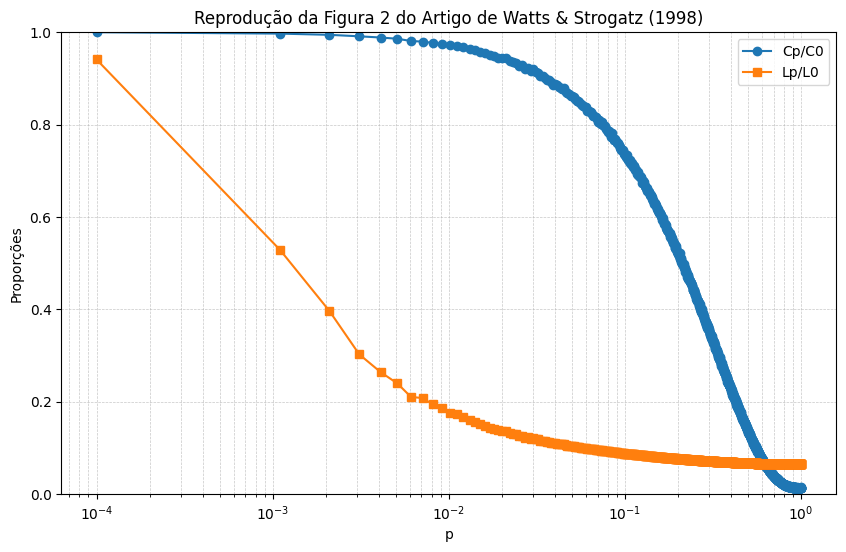

In [12]:
plot.figure(figsize=(10, 6))
plot.plot(ps, coef_clust_p, label='Cp/C0', marker='o')
plot.plot(ps, dist_media_p, label='Lp/L0', marker='s')
plot.xscale('log')
plot.xlabel("p")
plot.ylabel("Proporções")
plot.ylim(0, 1)
plot.legend()
plot.grid(True, which="both", ls="--", lw=0.5, alpha=0.7)
plot.title('Reprodução da Figura 2 do Artigo de Watts & Strogatz (1998)')
plot.show()